In [1]:
import pyqrcode
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
url = pyqrcode.create('http://ultramatis.com')
# url.png('ultramatis.png', scale=4)
# url.svg('ultramatis.svg', scale=4)

<IPython.core.display.Javascript object>


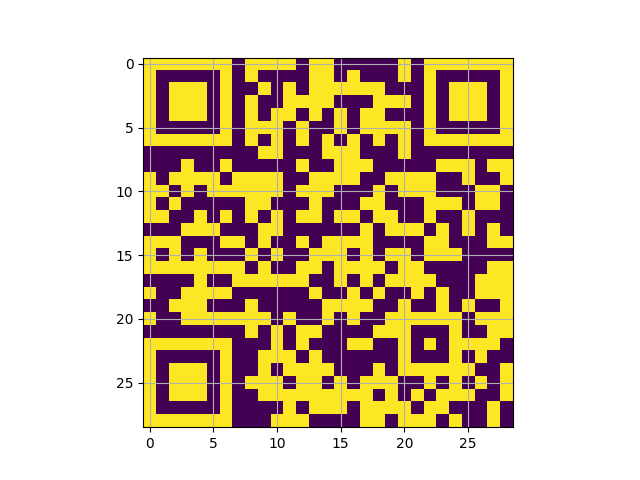

In [3]:
code = url.code
plt.figure()
plt.imshow(code)
plt.grid()

In [6]:
code = np.array(code)
code.shape
# code?

(29, 29)

In [34]:
# CHANGE THIS TO THE PIXEL WIDTH IN mm
PIXEL_WIDTH = 0.6
# CHANGE THIS TO THE GRID WIDTH IN mm
GRID_WIDTH = PIXEL_WIDTH / 4

# size of the QR code in mm
qr_size = PIXEL_WIDTH * code.shape[0]
print("QR Code x and y size: {} mm".format(qr_size))

def new_line():
    return 'G0 Z{}\n'.format(GRID_WIDTH)

def line(offset, length, speed=1, reverse=False):
    # Flip directions if reversed
    if reverse:
        offset = -offset
        length = -length
    # Write G-Code
    res = ''
    if offset != 0:
        res += 'G0 X{0:.2f}\n'.format(offset * PIXEL_WIDTH)
    if length != 0:
        res += 'G1 X{0:.2f} F{1}\n'.format(length * PIXEL_WIDTH, speed)
    return res

def row_to_gcode(row, reverse=False):
    if reverse:
        row = row[::-1]
    offset = 0  # Set x-offset of the pen
    length = 0
    gcode = ''
    last_bit = 1
    for bit in row:
        if bit != last_bit:
            if length:
                gcode += line(offset, length, reverse=reverse)
                offset = 0
                length = 0
            last_bit = bit
        if bit == 1:
            length += 1
        else:
            offset += 1
    # Draw line for whatever is left in the row
    gcode += line(offset, length, reverse=reverse)
    return gcode

coord = ''
# Loop through each row of the code
for row in code:
    for i in range(2):
        # Draw line forward
        coord += row_to_gcode(row)
        # Increment new line
        coord += new_line()
        # Draw line backward
        coord += row_to_gcode(row, reverse=True)
        # Increment new line
        coord += new_line()

QR Code x and y size: 17.4 mm


In [35]:
# Write to file
with open("write_qr.gcode", "w") as text_file:
    # Set to relative distance mode
    print('G91', file=text_file)
    # Set units to mm
    print('G21', file=text_file)
    # Set coordinate system to 0,0,0
    print('G92 X0 Y0 Z0\n', file=text_file)
    # Write coordinates
    print(coord, file=text_file)
    # End program
    print('M2', file=text_file)

In [29]:
more write_qr.gcode